# Imports

In [1]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
from pathlib import Path
%matplotlib inline

# Loading

In [2]:
data_dir = Path('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/')

In [3]:
list(data_dir.glob('**/*.mha'))

[PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_Flair.54512/VSD.Brain.XX.O.MR_Flair.54512.mha'),
 PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513/VSD.Brain.XX.O.MR_T1.54513.mha'),
 PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1c.54514/VSD.Brain.XX.O.MR_T1c.54514.mha'),
 PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54515/VSD.Brain.XX.O.MR_T2.54515.mha'),
 PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain_3more.XX.O.OT.54517/VSD.Brain_3more.XX.O.OT.54517.mha')]

In [4]:
[x for x in data_dir.iterdir() if x.is_dir()]

[PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_Flair.54512'),
 PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513'),
 PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1c.54514'),
 PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54515'),
 PosixPath('../data/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain_3more.XX.O.OT.54517')]

In [5]:
data = {}

In [6]:
for subdir in data_dir.iterdir():
    if 'DS_Store' in subdir.name: continue
    file_name = next((data_dir / subdir.name).glob('*.mha'))
    scan_type = subdir.name.split('.')[4]
    data[scan_type] = sitk.ReadImage(str(file_name))

In [7]:
data

{'MR_Flair': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x10485ed50> >,
 'MR_T1': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x1048b83f0> >,
 'MR_T1c': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x106f7d3c0> >,
 'MR_T2': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x106f7d5d0> >,
 'OT': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x106f7d390> >}

In [8]:
data[scan_type].GetSize()

(240, 240, 155)

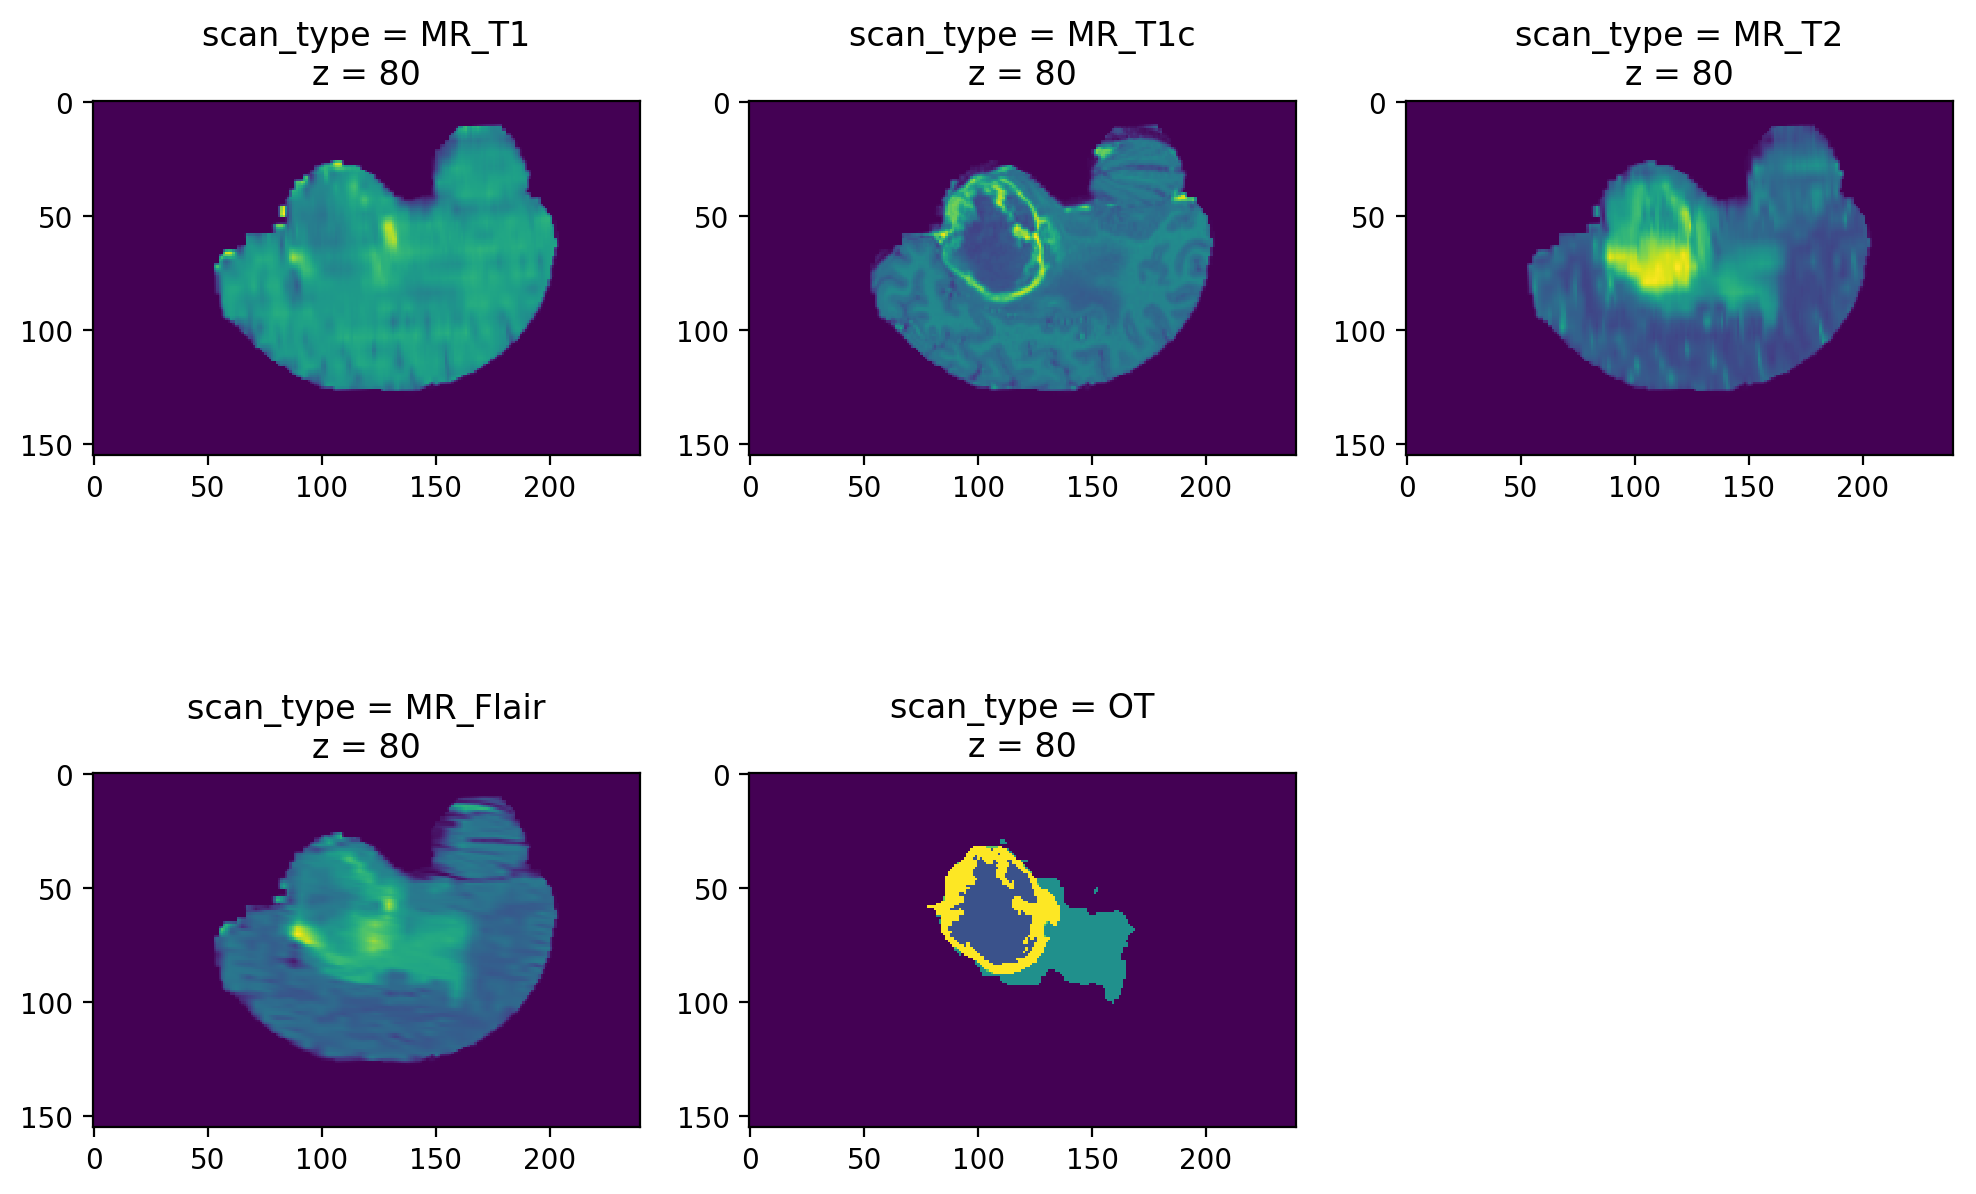

In [19]:
z = 80
fig = plt.figure(figsize=(12, 8))
for i, scan_type in enumerate(data):
    img_arr = sitk.GetArrayViewFromImage(data[scan_type])
    ax = plt.subplot(2, 3, i + 1)
    _ = ax.set_title('scan_type = {}\nz = {}'.format(scan_type, z))
    _ = ax.imshow(img_arr[:, :, z])

# Plotting

In [3]:
arr_img = sitk.GetArrayViewFromImage(img)
arr_img.shape

(155, 240, 240)

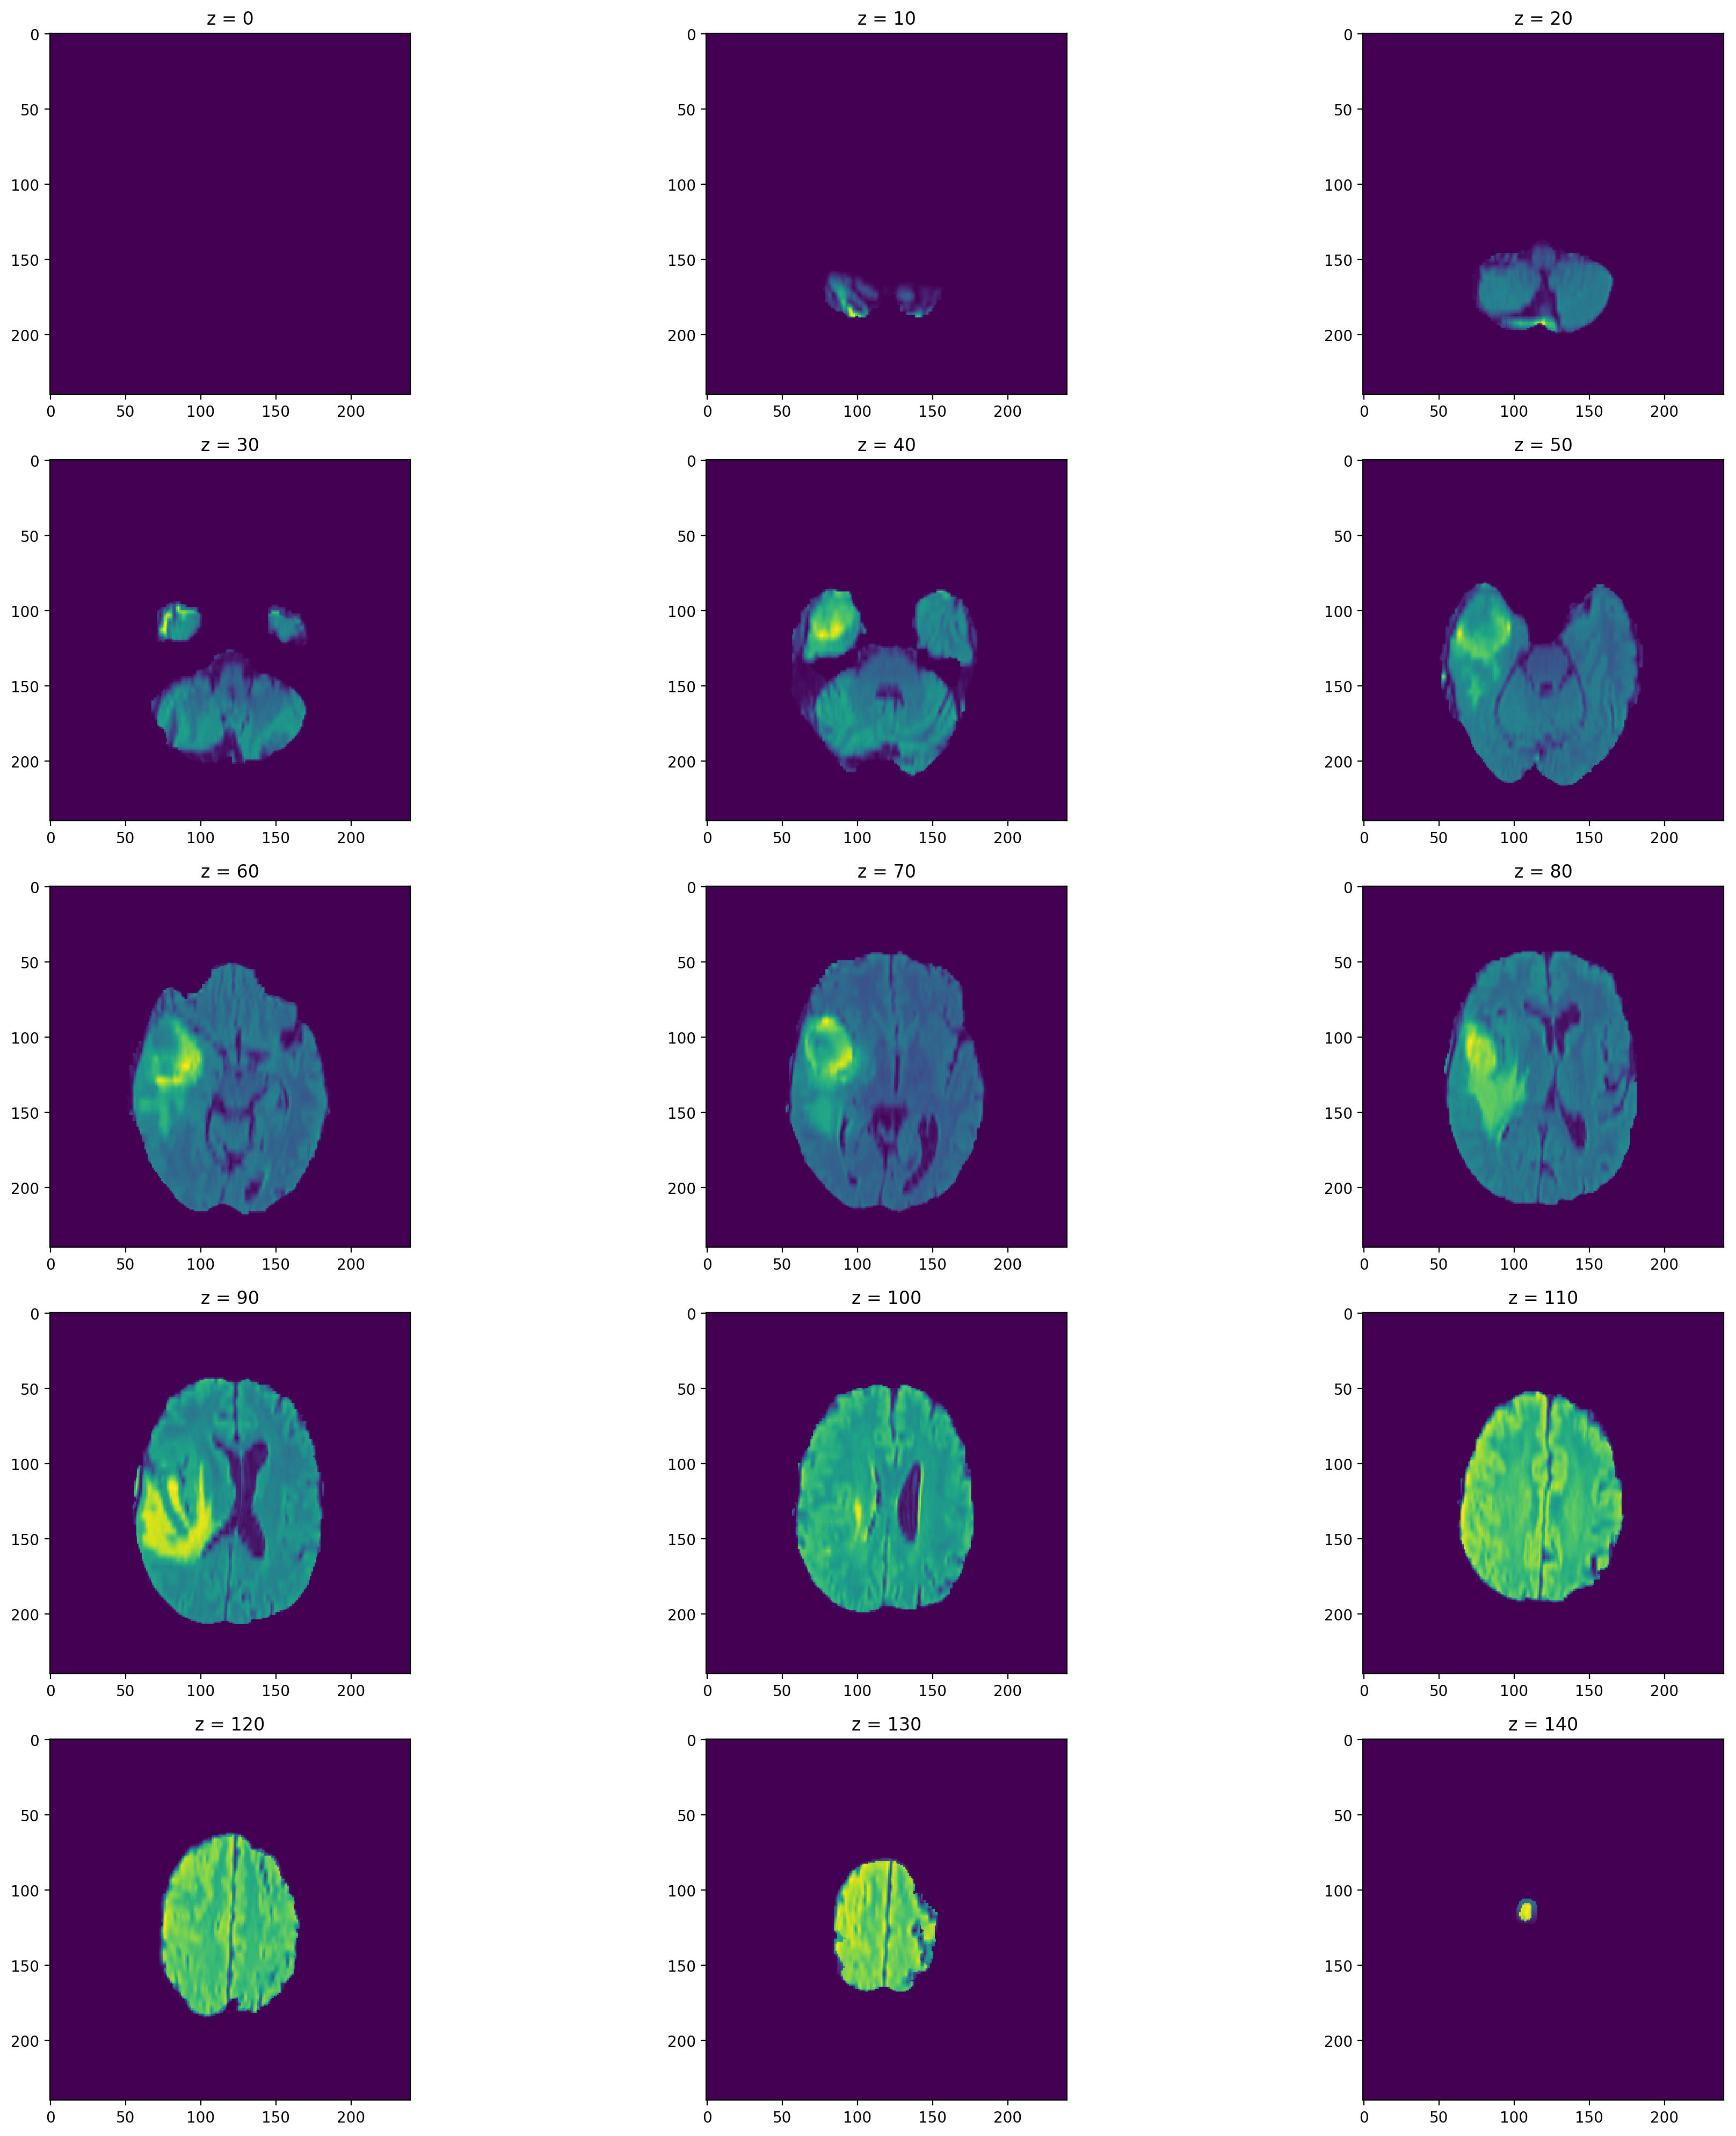

In [23]:
def gridplot(image):
    arr_img = sitk.GetArrayViewFromImage(img)
    fig, ax = plt.subplots(5, 3, figsize=(20, 20))
    for i, ax in enumerate(fig.axes):
        _ = ax.set_title('z = {}'.format(i * 10))
        _ = ax.imshow(arr_img[i * 10, :, :])

    _ = plt.tight_layout()
    
gridplot(img)

In [55]:
def myshow(img, **kwargs):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda, **kwargs)

(240, 240, 155)

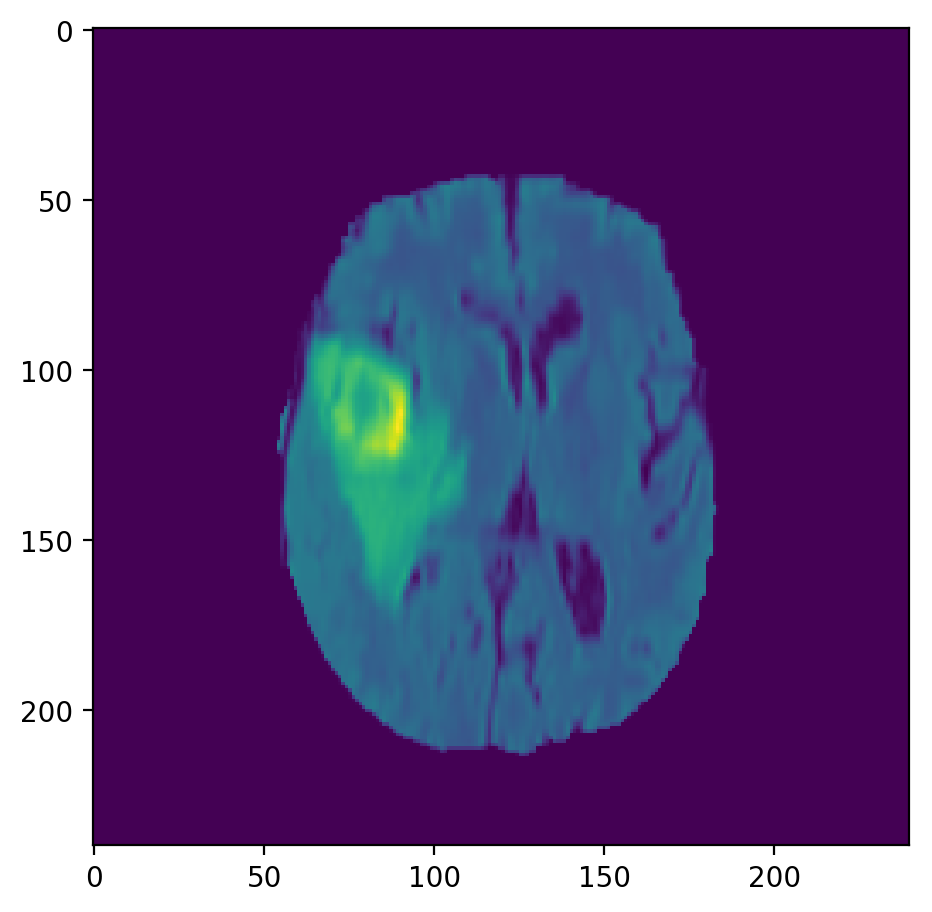

In [6]:
size = img.GetSize()
size
myshow(img[:, :, size[2] // 2])

In [9]:
ls ../example_submission

License_CC_BY_NC_ND_3.0.txt*          SMIR.Brain_3more.XX.O.OT.292597.mha*
SMIR.Brain_3more.XX.O.OT.292597.json*


In [15]:
submission_img = sitk.ReadImage('../example_submission/SMIR.Brain_3more.XX.O.OT.292597.mha')

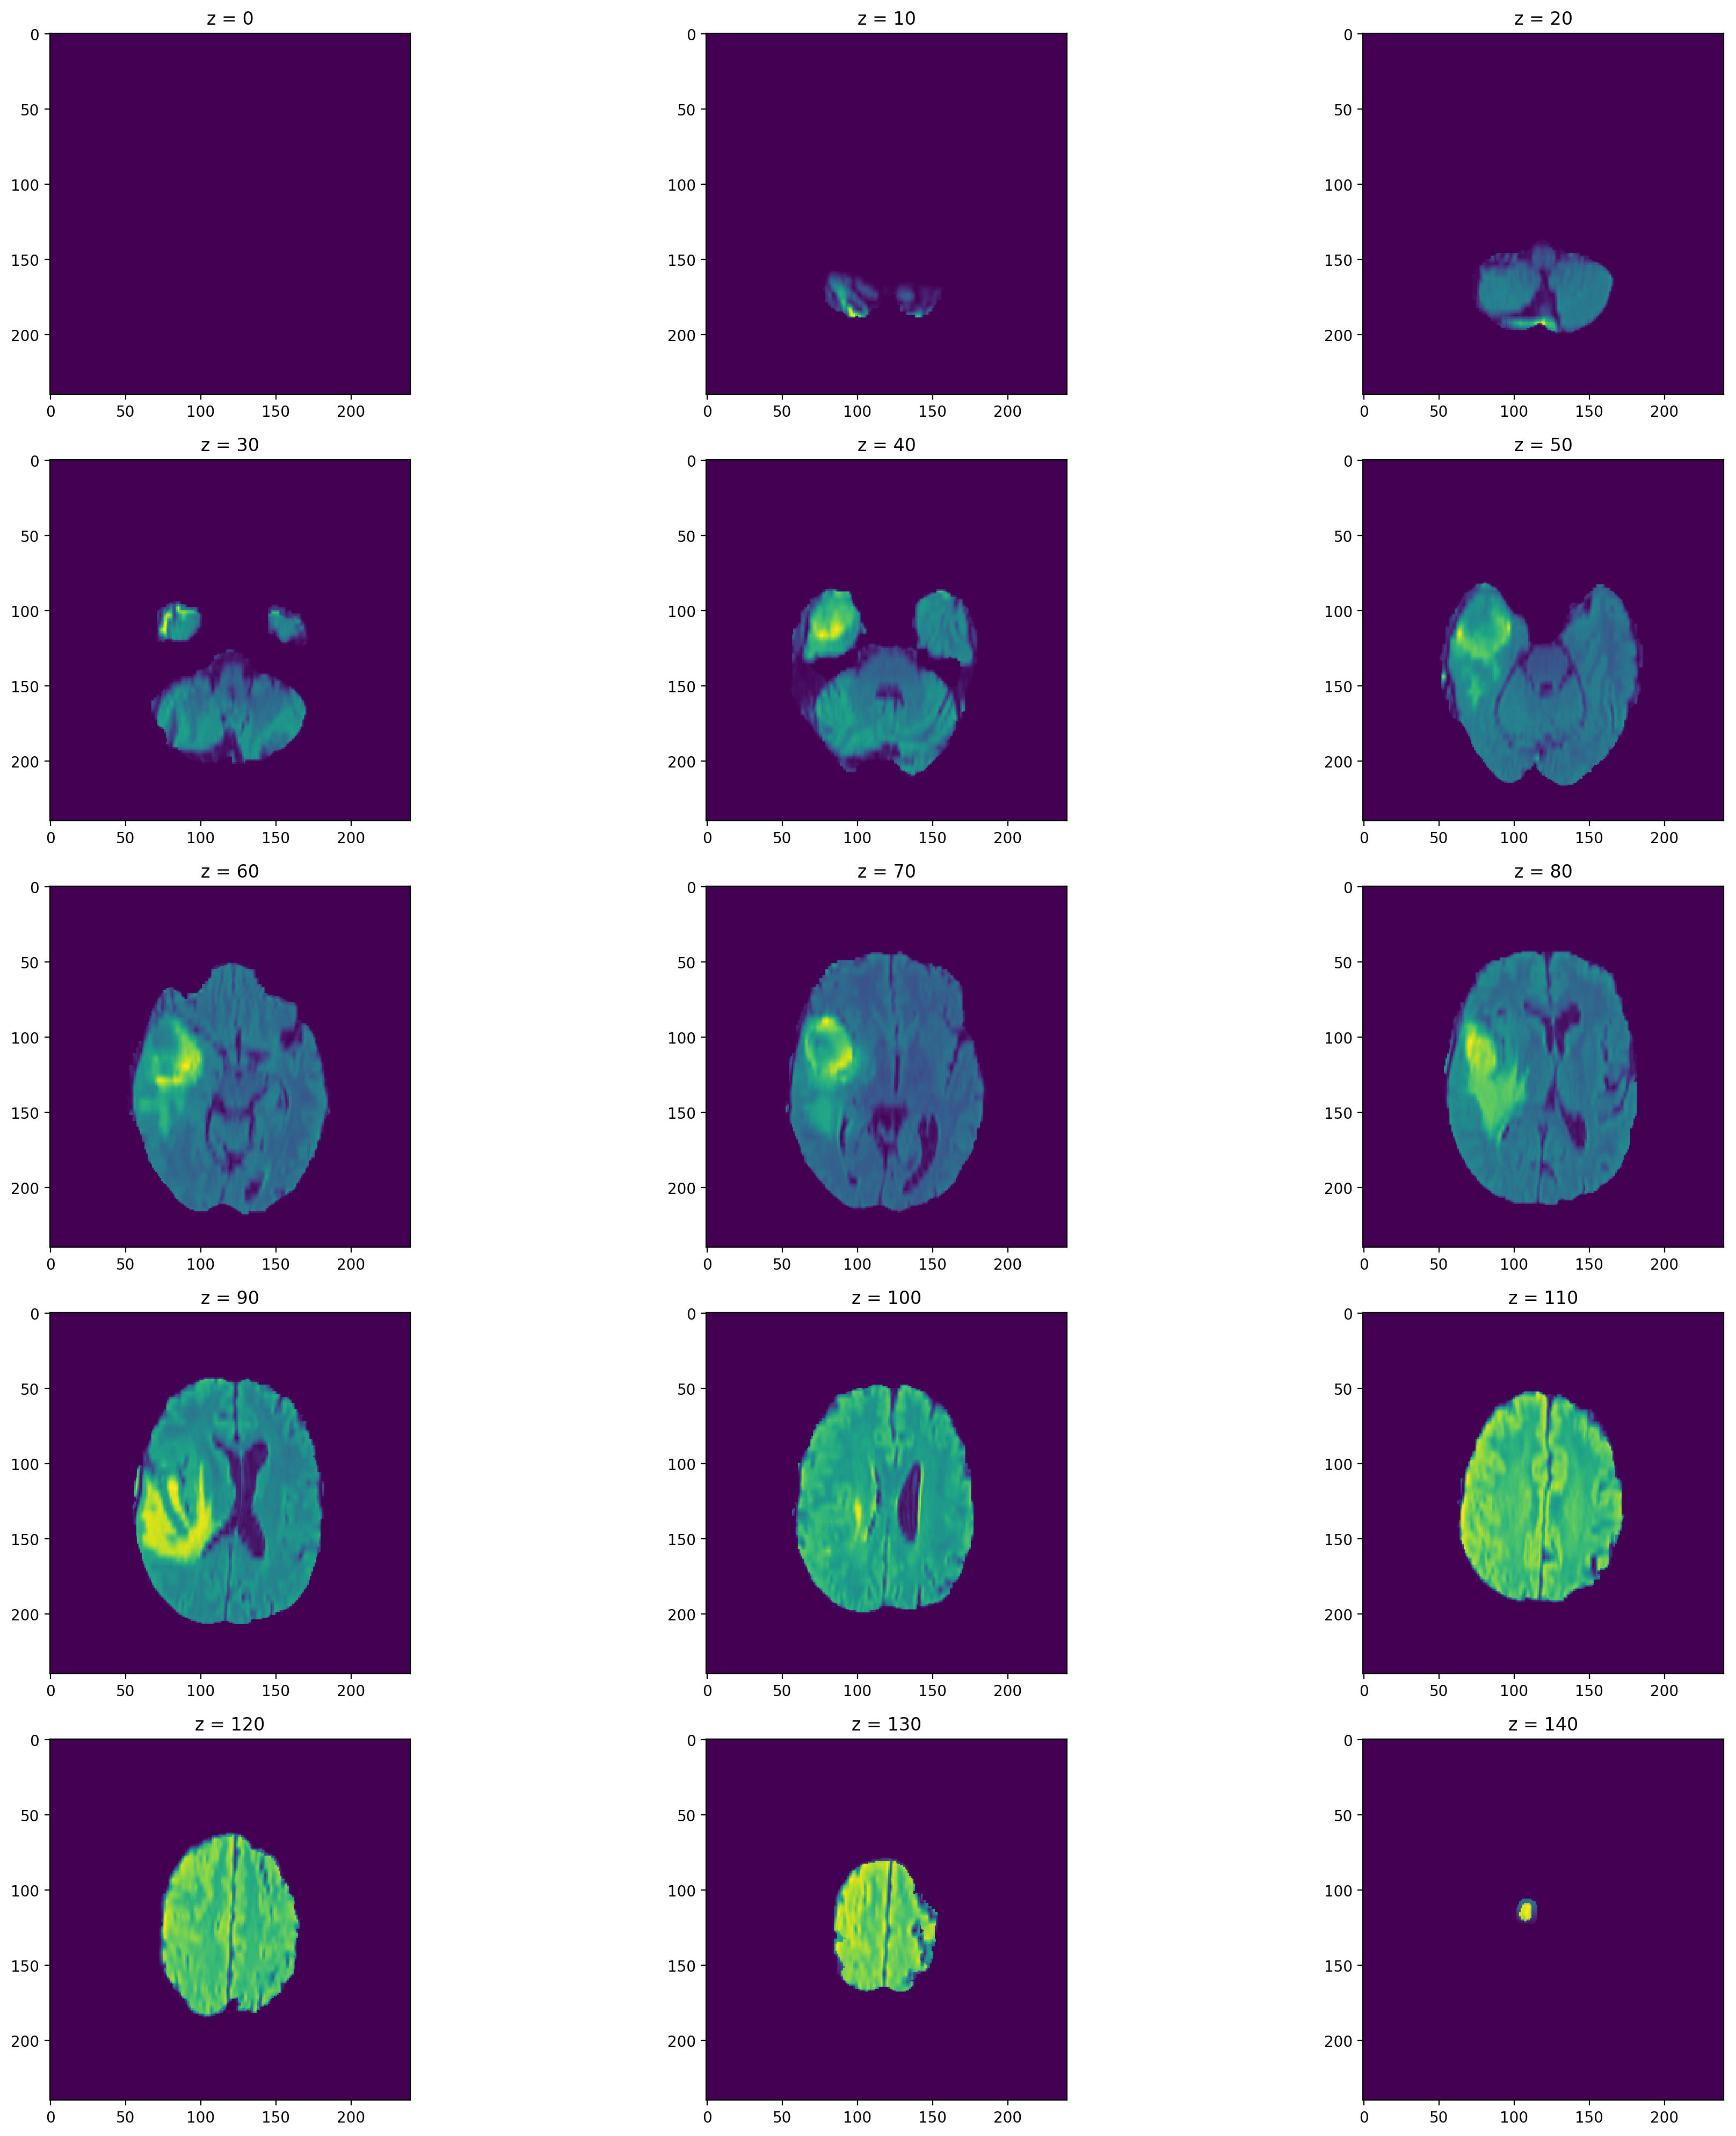

In [24]:
gridplot(submission_img)